# Simulations of scattering event according to original dynamics

In [1]:
using Plots


include("functions.jl")
using .TwoBodyScattering

In [22]:
#Define parameters for simulations

#Parameters taken from experimental values (in micrometers)
permit::Float64 = 6.95*1e-28;
diss_max::Float64 = 3/(4*pi*permit)*(9.76+4.64)^2*1e-32*(25*1e-9)^(-1);
gamma::Float64 = 3*0.56/(4*pi*permit)*(9.76^2-4.64^2)*1e-32*(75*1e-9)^(-1);
int_range::Float64 = 1.0/(120);
v0::Float64 = 50.0;

In [23]:
#Define required vectors and variables for saving results

total_N::Int64 = 100;
dphi::Float64 = 2*pi/total_N;
phi1seq = range(-pi, pi, total_N);
phi2seq = range(-pi, pi, total_N);
deltaps = Float64[];
dinit = Float64[];

# Simulate the scattering events and save outgoing angle

generate!(dinit, deltaps,
        dphi,
        gamma, v0, int_range, 0.0,
        dtf);

UndefVarError: UndefVarError: `dtf` not defined

In [24]:
pos_deltaps = Float64[];
pos_dinit = Float64[];
for i in 1:length(deltaps)
   if deltaps[i] < 0
        push!(pos_dinit, dinit[i]);
        push!(pos_deltaps, deltaps[i]);
    end
end
    

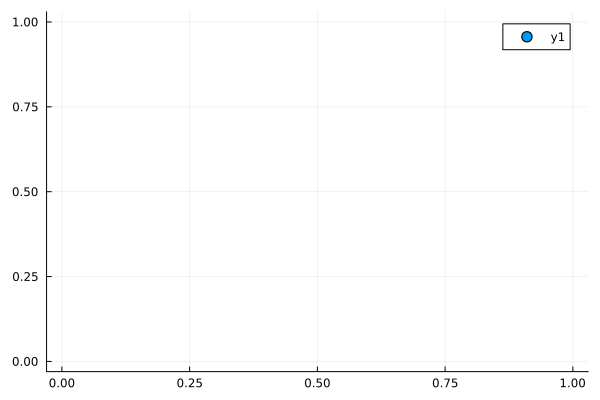

In [25]:
scatter(dinit,deltaps)

In [ ]:
#Run simulations at fixed v_0 for different values of dissipation

#Variables for simulation
total_N::Int64 = 100;
dphi::Float64 = 2*pi/total_N;
phi1seq::Vector{Float64} = range(-pi, pi, total_N);
phi2seq::Vector{Float64} = range(-pi, pi, total_N);
deltaps::Vector{Float64} = Float64[];
thetatot::Vector{Float64} = Float64[];
dinit::Vector{Float64} = Float64[];
dt::Float64 = 0.1;

#Parameters taken from experimental values (in micrometers)
permit::Float64 = 6.95*1e-28;
diss_max::Float64 = 3/(4*pi*permit)*(9.76+4.64)^2*1e-32*(25*1e-9)^(-1);
gamma::Float64 = 3*0.56/(4*pi*permit)*(9.76^2-4.64^2)*1e-32*(75*1e-9)^(-1);
int_range::Float64 = 1.0/(20);
v0::Float64 = 10.0;

print("Chosen parameters (micrometers): ", "\n",
        "Permittivity: ", permit, "\n",
        "Maximum value of dissipation: ", diss_max, "\n",
        "Intensity of rot. interactions: ", gamma, "\n")

#Ranges of values for dissipation intensity
cranges = 1000:1000:diss_max;
#Vector of averaged of pdp
avgpdps::Vector{Float64} = Vector{Float64}(undef, length(cranges)+1);

#Colours palette
palettes = range(colorant"red", stop=colorant"green", length=length(cranges));

#Generate first plot

generate!(dinit, thetatot, deltaps,
        dphi,
        gamma, v0, int_range, diss_max,
        dt);
rangex = -(pi):dphi:(pi-dphi);
avgpdp = zeros(length(rangex));
totn = zeros(length(rangex));
for x in 1:length(rangex)
    for i in 1:length(dinit)
        if modulate(dinit[i]) <= rangex[x] && modulate(dinit[i]) > rangex[x-1]
            avgpdp[x]+=deltaps[i];
            totn[x]+=1;
        end
    end
end
avgpdp = avgpdp./totn;
v = abs.(sin.(rangex./2)).*avgpdp;
avgpdps[1] = dphi*sum(vcat(v[2:Int((length(rangex)+1)/2)],v[Int((length(rangex)+1)/2)+2:end]));

p = plot(rangex[Int(total_N/2):(total_N-1)], avgpdp[Int(total_N/2):(total_N-1)], xticks=pitick(-pi,pi,4), color = palettes[1], legend=false)
xlabel!(p, "Delta")
ylabel!(p, "pdp")

#Generate plots for all ranges of intensities

# for i in 1:length(cranges)
#    generate!(dinit, thetatot, deltaps,
#         dphi,
#         gamma, v0, int_range, cranges[i],
#         dt);
    
#     avgpdp = zeros(length(rangex));
#     totn = zeros(length(rangex));
#     for x in 1:length(rangex)
#         for i in 1:length(dinit)
#             if modulate(dinit[i]) <= rangex[x] && modulate(dinit[i]) > rangex[x-1]
#                 avgpdp[x]+=deltaps[i];
#                 totn[x]+=1;
#             end
#         end
#     end
#     avgpdp = avgpdp./totn;
#     vs = abs.(sin.(rangex./2)).*avgpdp;
#     avgpdps[i+1] = dphi*sum(vcat(vs[2:Int((length(rangex)+1)/2)],vs[Int((length(rangex)+1)/2)+2:end]));

#     plot!(p, rangex[Int(total_N/2):(total_N-1)], avgpdp[Int(total_N/2):(total_N-1)], xticks=pitick(-pi,pi,4), color = palettes[i])
# end

In [ ]:
#Plot final result
p
#savefig("pdpv0100VaringDissfrom0to1.pdf")

In [ ]:
#Plot dependence of average of pdp on repulsion force
plot(vcat([0],cranges), avgpdps, color=:black, grid = false)
hline!([0,0], style=:dash)
xlabel!("Dissipation Strength")
ylabel!("Average of pdp")
#savefig("pdpvStrength.pdf")

In [57]:
#Plot movies of single scattering events
phi10::Float64 = +1.1;
phi20::Float64 = -1.1;

pdp, phi1t, phi2t, a11, a22 = TwoBodyScattering.scatteringmovie(phi10, phi20, 1/20, 0.1, gamma, 10.0, 30000.0)
pdp, phi1t, phi2t, a11_1, a22_ = TwoBodyScattering.scatteringmovie(phi10, phi20, 1/20, 0.01, gamma, 100.0, 30000.0)


lims = 20;
steps = 1;
animd = @animate for i in 1:steps:length(a11)
    plot(Tuple.(a11[i]), xlims=(-lims,lims+500), ylims=(-lims+lims/2,lims))
    plot!(Tuple.(a22[i]))
end

animd_1 = @animate for i in 1:steps:length(a11_1)
    plot(Tuple.(a11_1[i]), xlims=(-lims,lims+500), ylims=(-lims+lims/2,lims))
    plot!(Tuple.(a22_1[i]))
end

Animation("/var/folders/jn/hzpz5fjx36x_y2ydy2_b66sc0000gp/T/jl_dcKTve", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000097.png", "000098.png", "000099.png", "000100.png", "000101.png", "000102.png", "000103.png", "000104.png", "000105.png", "000106.png"])

In [ ]:
gif(animd_1, fps = 30)

## Average over different velocities and make phase diagram

In [22]:
#Variables for simulations
total_N::Int64 = 100;
dphi::Float64 = 2*pi/total_N;
phi1seq::Vector{Float64} = range(-pi, pi, total_N);
phi2seq::Vector{Float64} = range(-pi, pi, total_N);
deltaps::Vector{Float64} = Float64[];
thetatot::Vector{Float64} = Float64[];
dinit::Vector{Float64} = Float64[];

#Parameters taken from experimental values (in micrometers)
permit::Float64 = 6.95*1e-28;
diss_max::Float64 = 3/(4*pi*permit)*(9.76+4.64)^2*1e-32*(25*1e-9)^(-1);
gamma::Float64 = 3*0.56/(4*pi*permit)*(9.76^2-4.64^2)*1e-32*(75*1e-9)^(-1);
int_range::Float64 = 1.0/(10);

#Vectors for choices of velocities and savings of total averages of pdp
rangesv::Vector{Float64} = 1:2:100;
avgspdpv::Vector{Float64} = zeros(length(rangesv));
third_order::Vector{Float64} = zeros(length(rangesv));
dphis::Vector{Float64} = -(pi):dphi:(pi-dphi);

calc_avg!(avgspdpv, third_order,
        rangesv, dphis,
        gamma, diss_max, int_range,
        dphi)

In [23]:
#Calculate whether flocking happens or not, by creating corresponding matrix

#Rotational diffusion contstant
Dr::Float64 = 0.15;
#Effective range of interactions
rangeLambda::Float64 = 10.0;
#Radius of particle
rparticle::Float64 = 1.5;
#Area of single particle
Ap::Float64 = pi*rparticle^2;

#Vectors to iterate over
afractions::Vector{Float64} = 0.01:0.02:0.26;
densities::Vector{Float64} = afractions.*1/Ap;
totalmus::Matrix{Float64} = zeros(length(rangesv), length(densities));
totalxis::Matrix{Float64} = zeros(length(rangesv), length(densities));
polarizations::Matrix{Float64} = zeros(length(rangesv), length(densities));



for i in 1:length(rangesv)
    for j in 1:length(densities)
        totalmus[i,j] = 1/(2*pi)*2*rangeLambda*densities[j]*rangesv[i]*avgspdpv[i]-Dr;
        totalxis[i,j] = 1/(2*pi)*2*rangeLambda*densities[j]*rangesv[i]*third_order[i];
        if totalmus[i,j] < 0
            polarizations[i,j] = 0;
        elseif totalmus[i,j] > 0 && totalxis[i,j] > 0
            polarizations[i,j] = sqrt(totalmus[i,j]/totalxis[i,j]);
        end
    end
end



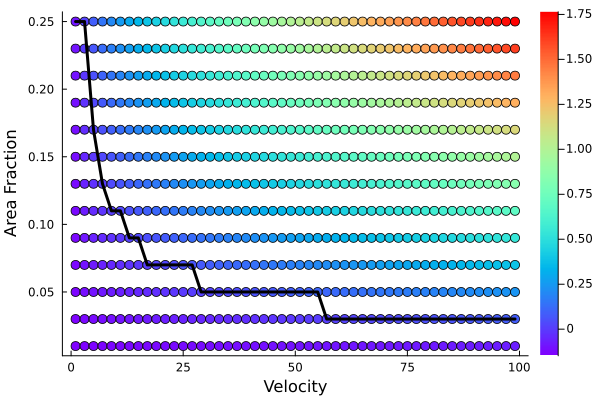

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


In [43]:
#Plot heatmap
z = transpose(totalmus)[:];
y = repeat(afractions, length(afractions));
x = repeat(rangesv, inner = length(afractions));
negativeaf = zeros(length(rangesv));
for i in 1:length(rangesv)
    j::Int64 = 1;
    while polarizations[i,j] == 0
        j+=1;
        if j > length(afractions)
            j -= 1;
            break
        end
    end
    negativeaf[i] = afractions[j];
end
scatter(x, y, zcolor = z, grid = false, markersize = 5, c=:rainbow1, legend = false, colorbar = true)
plot!(rangesv, negativeaf, color=:black, linewidth=3, legend = false)
xlabel!("Velocity")
ylabel!("Area Fraction")
#savefig("phasediagram.pdf")

In [42]:
heatmap(z)

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
